In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
def init():   # 讀檔初始化函数

    # the knapsack capacity.
    file = open('p06_c.txt', 'r')
    c = int(file.read())
    file.close()
    
    # the weights of the objects. 
    file = open('p06_w.txt', 'r')
    for line in file.readlines():        
        w.append(int(line))
    file.close

    # the profits of each object.
    file = open('p06_p.txt', 'r')
    for line in file.readlines():        
        p.append(int(line))
    file.close
    
    return c,p,w

In [3]:
# STEP 1 Initial:
# 隨機產生出一組合法解 (至多2的15次方種可能解)

def ramdomSolution():
    # 紀錄物品拿取狀態 不拿:0 拿:1
    item_status = [ random.randint(0,1) for _ in range(n)]
    total_weight = 0
    is_solution = 0
    profit = 0

    while(is_solution == 0):
        for i in range(n):
            if(item_status[i] == 1):
                total_weight += w[i]
                profit += p[i]

        if(total_weight <= c):
            is_solution = 1
        else: 
            item_status = [ random.randint(0,1) for _ in range(n)]
            total_weight = 0
            profit = 0
            
    return item_status, profit ,total_weight

In [8]:
# STEP 2 Transition: 隨機 / 左右 移動
# 找鄰近解
# 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
# 採左右移動 (2)將任兩不同值位置 0、1對調  

# STEP 3 Evalution: 評估適應值(Fitness value)大小

def getNeighbor(solution, profit, weight):
    
    n = len(solution)
    is_solution = False
    
    neightbor_sol = solution.copy()
    neighbor_profit = profit
    neighbor_weight = weight

    # 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
    while(is_solution is False):
        
        i = random.randint(0,n-1)

        if(neightbor_sol[i] == 0):
            
            neighbor_weight += w[i]

            # 檢查鄰近解是否符合法解(多拿一物品是否超過背包容量)
            if(neighbor_weight <= c):
                neightbor_sol[i]=1
                neighbor_profit += p[i]
                is_solution = True
            else:
                # 不符合合法解，恢復原本重量，重進 while 迴圈取新鄰近解
                neighbor_weight -= w[i]
        else: 
            neightbor_sol[i] = 0
            neighbor_profit -= p[i]
            neighbor_weight -= w[i]
            
            # 少拿一物品必符合和法解，存鄰近合法解
            is_solution = True
 
    return neightbor_sol, neighbor_profit, neighbor_weight

In [9]:
# STEP 4 Determination: 將 STEP 3 評估出的適應值與先前的進行比較

def hillClimbing(current_sol, currrent_profit, current_weight):
    
    neightbor_sol, neighbor_profit, neighbor_weight = getNeighbor(current_sol, currrent_profit, current_weight)
    print("\n鄰近解: " + str(neightbor_sol))
    print("鄰近解獲利: " + str(neighbor_profit))
    print("鄰近解總重: " + str(neighbor_weight))

    # 鄰近解若優於或等於先前解則更新
    if(currrent_profit <= neighbor_profit):

        current_sol = neightbor_sol
        currrent_profit = neighbor_profit
        current_weight = neighbor_weight
    
    return current_sol,currrent_profit,current_weight

In [45]:
# main code

# STEP 0 Setting: 初始參數:
global c,w,p,n; 
w=[]
p=[]

# 迭代次數(Iteration)
iteration = 100

c,p,w = init()
print("capacity:",c)
print("profit:",p)
print("weight:",w)

# 15 objects len(w)
n = len(w) 
print("item 數:",n)

# STEP 1 Initial:
# 隨機產生出一組合法解 (至多2的15次方種可能解)
current_sol, currrent_profit, current_weight = ramdomSolution()
print("\n新解: " + str(current_sol))
print("新解獲利: " + str(currrent_profit))
print("新解總重: " + str(current_weight))

profit_history = []

# 迭代 500 次停止
for k in range(iteration):
    
    current_sol, currrent_profit, current_weight = hillClimbing(current_sol, currrent_profit, current_weight)
    
    # 紀錄每次迭代的獲利
    profit_history.append(currrent_profit)
    
    print("\n第" + str(k+1) + "輪: ")
    print("解: " + str(current_sol))
    print("解獲利: " + str(currrent_profit))
    print("解總重: " + str(current_weight))

print("\n最後解: " + str(current_sol))
print("最後獲利: " + str(currrent_profit))
print("最後總重: " + str(current_weight)) 

capacity: 170
profit: [442, 525, 511, 593, 546, 564, 617]
weight: [41, 50, 49, 59, 55, 57, 60]
item 數: 7

新解: [1, 0, 1, 0, 1, 0, 0]
新解獲利: 1499
新解總重: 145

鄰近解: [1, 0, 1, 0, 0, 0, 0]
鄰近解獲利: 953
鄰近解總重: 90

第1輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [0, 0, 1, 0, 1, 0, 0]
鄰近解獲利: 1057
鄰近解總重: 104

第2輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [1, 0, 0, 0, 1, 0, 0]
鄰近解獲利: 988
鄰近解總重: 96

第3輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [1, 0, 1, 0, 0, 0, 0]
鄰近解獲利: 953
鄰近解總重: 90

第4輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [0, 0, 1, 0, 1, 0, 0]
鄰近解獲利: 1057
鄰近解總重: 104

第5輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [1, 0, 1, 0, 0, 0, 0]
鄰近解獲利: 953
鄰近解總重: 90

第6輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [0, 0, 1, 0, 1, 0, 0]
鄰近解獲利: 1057
鄰近解總重: 104

第7輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [1, 0, 1, 0, 0, 0, 0]
鄰近解獲利: 953
鄰近解總重: 90

第8輪: 
解: [1, 0, 1, 0, 1, 0, 0]
解獲利: 1499
解總重: 145

鄰近解: [1, 0, 1, 0, 0, 0, 0]
鄰近解獲利: 953
鄰近

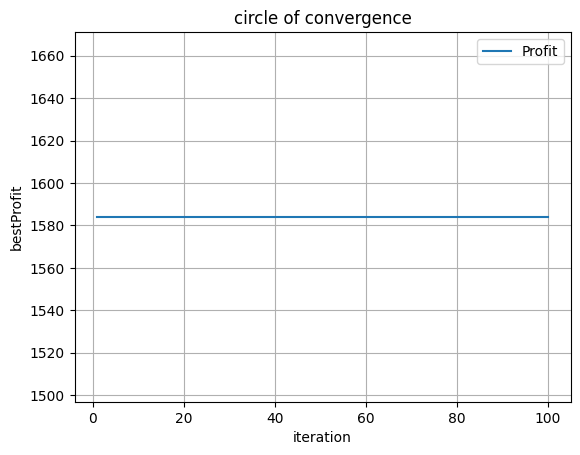

In [42]:
def plotIteration(profit_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of convergence')
    plt.plot(range(1, iterationTime + 1), profit_history, label='Profit')
    plt.xlabel('iteration')
    plt.ylabel('bestProfit')
    plt.legend()
    plt.grid()
    plt.show()
    
# 畫收斂圖
plotIteration(profit_history, iteration)